In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Cleaning and Preparation
- Load the dataset and handle any missing or incorrect values.
- Convert the 'year' column to numeric and address any anomalies (e.g., future years, very old years that are likely errors).


In [3]:
df = pd.read_csv('gcar_data.csv')

In [4]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

CONCLUSION:
1. In 6 Columns there are some null values
2. Datatypes: Object and Numeric
3. Memory Usage: 11.4+ MB's

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
brand,0
model,0
color,76
registration_date,1
year,0
price_in_euro,0
power_kw,75
power_ps,72
transmission_type,0


### Handling Missing Values

In [7]:
df['color'].fillna(df['color'].mode(), inplace=True)

In [8]:
df.dropna(subset=['registration_date'], inplace=True)

In [9]:
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')

In [10]:
df['power_kw'].fillna(df['power_kw'].median(), inplace=True)

In [11]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

In [12]:
df['power_ps'].fillna(df['power_ps'].median(), inplace=True)

In [13]:
df['mileage_in_km'] = pd.to_numeric(df['mileage_in_km'], errors='coerce')

In [14]:
df['mileage_in_km'].fillna(df['mileage_in_km'].median(), inplace=True)

### Handling Year Column

In [15]:
# Remove the unnamed index column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
# Convert the 'year' column to numeric, coercing errors and dropping any rows with unrealistic years
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [17]:
df.describe()

,year,power_kw,power_ps,mileage_in_km
count,99947.000000,99999.000000,99999.000000,9.999900e+04
mean,2016.438522,140.612796,191.026340,8.558712e+04
std,7.441014,84.728426,112.641761,7.927187e+04
min,1995.000000,1.000000,1.000000,0.000000e+00
25%,2014.000000,88.000000,120.000000,2.555000e+04
50%,2018.000000,117.000000,159.000000,6.800000e+04
75%,2020.000000,160.000000,218.000000,1.270000e+05
max,3700.000000,2021.000000,2022.000000,3.800000e+06


In [18]:
# Handle any future years or very old years that are likely errors (assuming cars are from 1900-2024)
df = df[(df['year'] >= 1900) & (df['year'] <= 2024)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     99946 non-null  object 
 1   model                     99946 non-null  object 
 2   color                     99870 non-null  object 
 3   registration_date         99946 non-null  object 
 4   year                      99946 non-null  float64
 5   price_in_euro             99946 non-null  object 
 6   power_kw                  99946 non-null  float64
 7   power_ps                  99946 non-null  float64
 8   transmission_type         99946 non-null  object 
 9   fuel_type                 99946 non-null  object 
 10  fuel_consumption_l_100km  88707 non-null  object 
 11  fuel_consumption_g_km     99946 non-null  object 
 12  mileage_in_km             99946 non-null  float64
 13  offer_description         99946 non-null  object 
dtypes: float64(

2. Descriptive Statistics
  
- Provide summary statistics (mean, median, mode, range, variance, standard deviation) for the numeric columns: price_in_euro, power_kw, power_ps,mileage_in_km.
- Identify the most and least expensive cars by brand and model.

In [20]:
# Convert the 'price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_l_100km' to numeric
# Handle potential non-numeric values by coercing errors

df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

In [21]:
# price_in_euro, power_kw, power_ps, mileage_in_km : (mean, median, mode, range, variance, standard deviation)
print(df.describe())
print('variance price_in_euro : ', df['price_in_euro'].var())
print('variance power_kw : ', df['power_kw'].var())
print('variance power_ps : ', df['power_ps'].var())
print('variance mileage_in_km : ', df['mileage_in_km'].var())

               year  price_in_euro      power_kw      power_ps  mileage_in_km
count  99946.000000   9.994600e+04  99946.000000  99946.000000   9.994600e+04
mean    2016.421678   2.941620e+04    140.435835    191.017449   8.561169e+04
std        5.197073   4.777578e+04     82.658858    112.362778   7.928285e+04
min     1995.000000   1.500000e+02      1.000000      1.000000   0.000000e+00
25%     2014.000000   1.290000e+04     88.000000    120.000000   2.557625e+04
50%     2018.000000   2.049000e+04    117.000000    159.000000   6.800000e+04
75%     2020.000000   3.248000e+04    160.000000    218.000000   1.270000e+05
max     2023.000000   5.890500e+06    735.000000    999.000000   3.800000e+06
variance price_in_euro :  2282525073.4702487
variance power_kw :  6832.48673782687
variance power_ps :  12625.393982372376
variance mileage_in_km :  6285770839.497357


In [22]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,ford,Ford Kuga,black,05/2023,2023.0,38490,140.0,190.0,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,hyundai,Hyundai i10,black,09/2018,2018.0,11555,49.0,67.0,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,audi,Audi Q4 e-tron,grey,05/2021,2021.0,48886,125.0,170.0,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,honda,Honda CR-V,red,07/2018,2018.0,24490,114.0,155.0,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,kia,Kia Sportage,black,02/2023,2023.0,34990,110.0,150.0,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [23]:
df['brand'].unique()

array(['ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
       'citroen', 'alfa-romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
       'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
       'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
       'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'], dtype=object)

In [24]:
# Identify the most and least expensive cars by brand and model
most_expensive_cars = df.loc[df['price_in_euro'].idxmax(), ['brand', 'model', 'price_in_euro']]
least_expensive_cars = df.loc[df['price_in_euro'].idxmin(), ['brand', 'model', 'price_in_euro']]

most_expensive_cars, least_expensive_cars

(brand            lamborghini
 model            Lamborghini
 price_in_euro        5890500
 Name: 61115, dtype: object,
 brand                   ford
 model            Ford Ka/Ka+
 price_in_euro            150
 Name: 93244, dtype: object)

3. Distribution Analysis
- Create histograms to visualize the distributions of price_in_euro , power_kw , mileage_in_km . Discuss any skewness in the data.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='price_in_euro', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Price in Euro')

Text(0.5, 0, 'Price in Euro')

Text(0, 0.5, 'Frequency')

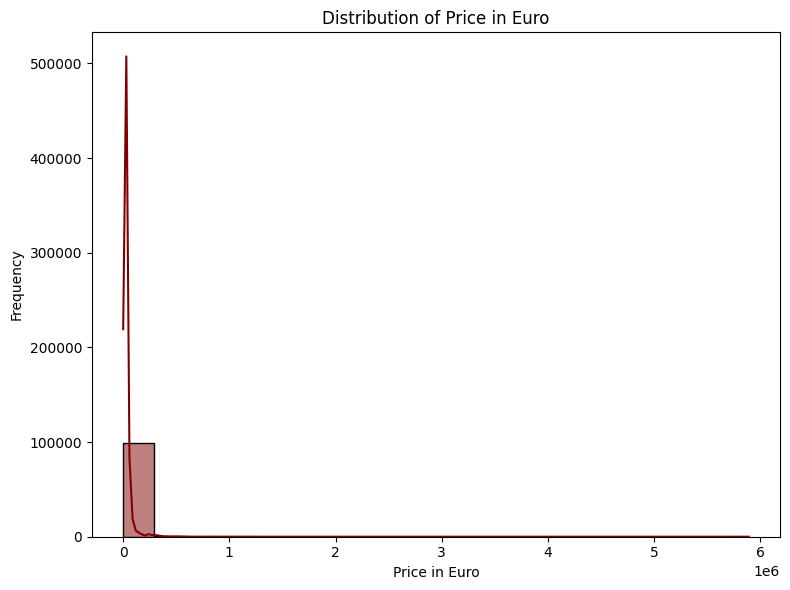

In [25]:
# Set up the plotting area
plt.figure(figsize=(8, 6))
# Histogram for 'price_in_euro'
sns.histplot(df['price_in_euro'], kde=True, bins=20, color='maroon')
plt.title('Distribution of Price in Euro')
plt.xlabel('Price in Euro')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='power_kw', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Power (kW)')

Text(0.5, 0, 'Power (kW)')

Text(0, 0.5, 'Frequency')

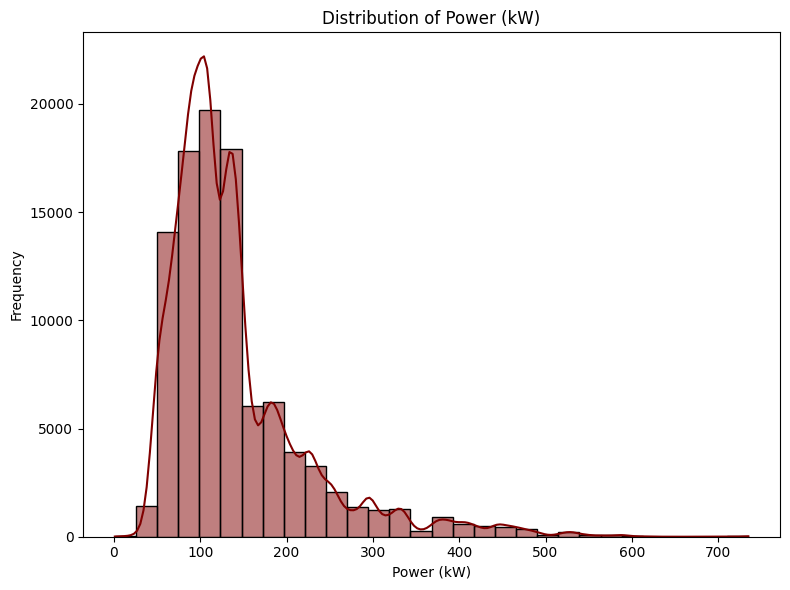

In [26]:
# Histogram for 'power_kw'
plt.figure(figsize=(8, 6))
sns.histplot(df['power_kw'], kde=True, bins=30, color='maroon')
plt.title('Distribution of Power (kW)')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='mileage_in_km', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Mileage in KM')

Text(0.5, 0, 'Mileage (KM)')

Text(0, 0.5, 'Frequency')

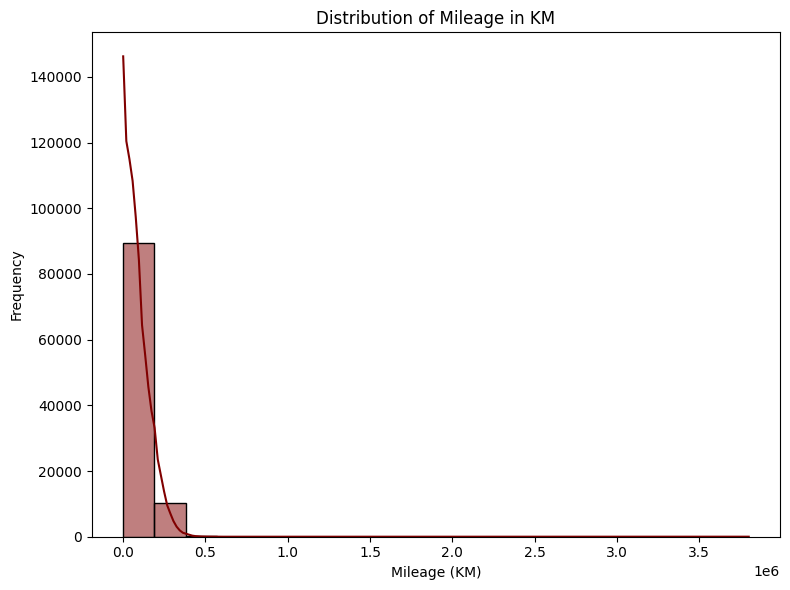

In [27]:
# Histogram for 'mileage_in_km'
plt.figure(figsize=(8, 6))
sns.histplot(df['mileage_in_km'], kde=True, bins=20, color='maroon')
plt.title('Distribution of Mileage in KM')
plt.xlabel('Mileage (KM)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

4. Categorical Data Analysis
- Count and visualize the number of vehicles by brand . Which brand has the most listings?
- Analyze the distribution of transmission_type and fuel_type across the dataset.

In [28]:
# Count the number of vehicles by brand
brand_counts = df['brand'].value_counts()
brand_counts

,count
brand,
audi,21152
bmw,19797
ford,18775
hyundai,6987
kia,5729
fiat,5035
citroen,4081
dacia,3366
land-rover,3073


<Figure size 1200x800 with 0 Axes>

<ipython-input-29-44d15fcad1a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=brand_counts.index, x=brand_counts.values, palette="viridis", edgecolor='black')


<Axes: ylabel='brand'>

Text(0.5, 1.0, 'Number of Vehicles by Brand')

Text(0.5, 0, 'Number of Vehicles')

Text(0, 0.5, 'Brand')

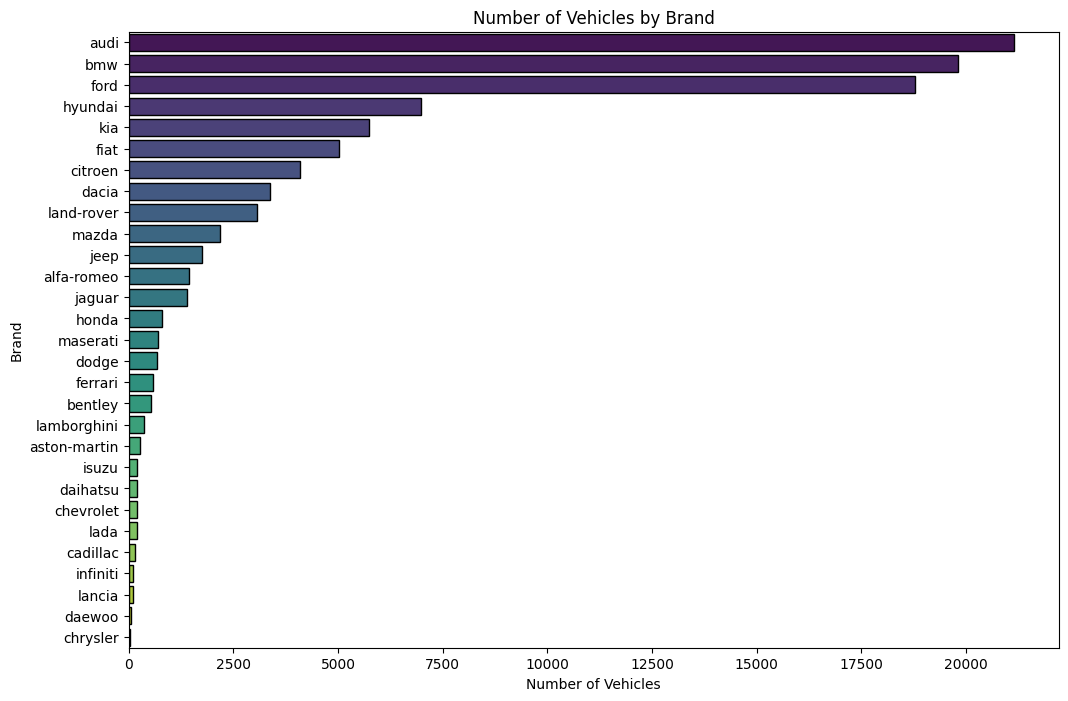

In [29]:
# Plot the number of vehicles by brand
plt.figure(figsize=(12, 8))
sns.barplot(y=brand_counts.index, x=brand_counts.values, palette="viridis", edgecolor='black')
plt.title('Number of Vehicles by Brand')
plt.xlabel('Number of Vehicles')
plt.ylabel('Brand')
plt.show()

In [30]:
# Identify the brand with the most listings
most_listed_brand = brand_counts.idxmax()
most_listed_count = brand_counts.max()

most_listed_brand, most_listed_count

('audi', 21152)

CONCLUSION:
- Audi, BMW and Ford these 3 brands have the most number of vehicle counts.
- Almost 60-70% vehicles belong to these 3 Brands.
- From Hyundai till Jaguar there is some contribution from these brands.
- After that there are N number of brands with there vehicle counts contributing extremely less.

In [31]:
# Count the distribution of transmission types
transmission_counts = df['transmission_type'].value_counts()
transmission_counts

,count
transmission_type,
Automatic,53242
Manual,46067
Unknown,502
Semi-automatic,135


<Figure size 600x600 with 0 Axes>

<ipython-input-32-7943b703f6f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission_type', data=df, palette="flare", edgecolor='black')


<Axes: xlabel='transmission_type', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Transmission Types')

Text(0.5, 0, 'Transmission Type')

Text(0, 0.5, 'Count')

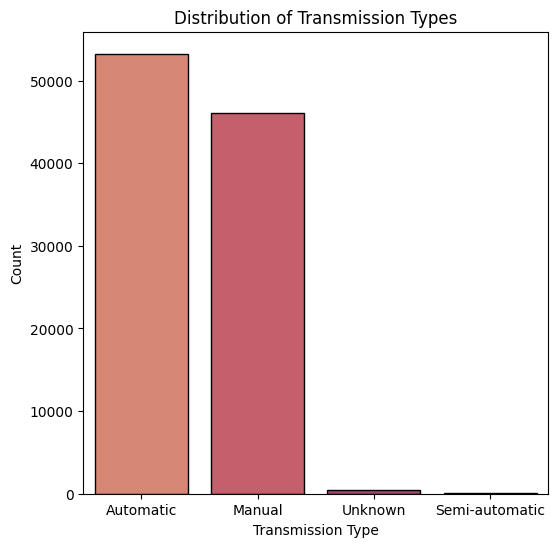

In [32]:
# Plot the distribution of transmission types
plt.figure(figsize=(6, 6))
sns.countplot(x='transmission_type', data=df, palette="flare", edgecolor='black')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

CONCLUSION :
- Automatic and Manual type of transmission are heavily used.
- Semiautomatic and Unknown type of transmission are almost not being used.

In [33]:
# Count the distribution of fuel types
fuel_type_counts = df['fuel_type'].value_counts()
fuel_type_counts

,count
fuel_type,
Petrol,54290
Diesel,37593
Hybrid,4291
Electric,2467
LPG,930
Diesel Hybrid,137
Other,84
CNG,61
Unknown,45


<Figure size 1200x600 with 0 Axes>

<ipython-input-34-89a1b59d7b16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=df, palette="flare", edgecolor='black')


<Axes: xlabel='fuel_type', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Fuel Types')

Text(0.5, 0, 'Fuel Type')

Text(0, 0.5, 'Count')

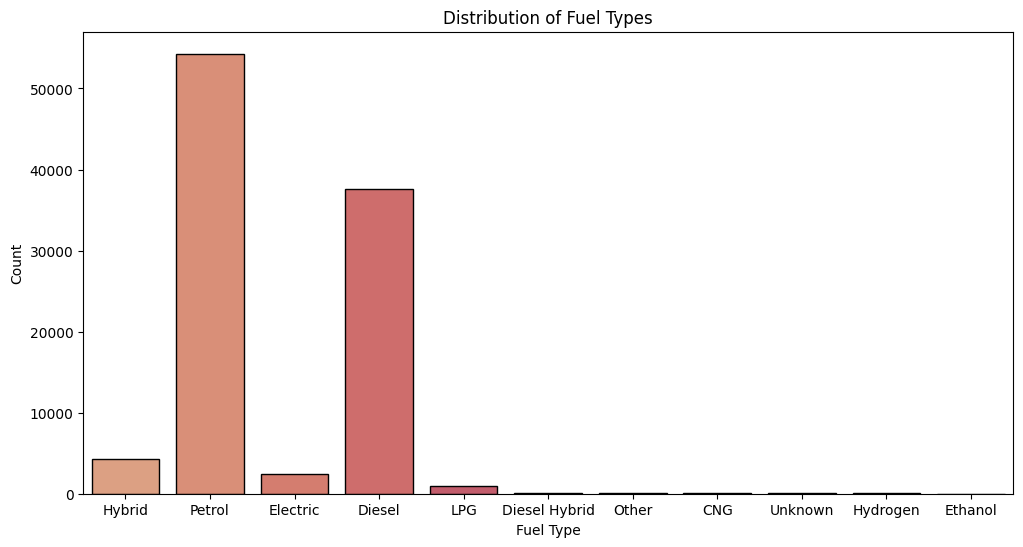

In [34]:
# Plot the distribution of fuel types
plt.figure(figsize=(12, 6))
sns.countplot(x='fuel_type', data=df, palette="flare", edgecolor='black')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

CONCLUSION :
- Petrol and Diesel fuel types are dominating.
- Rest of the fuel types are not that favourable.

5. Time Series Analysis
- Plot the number of vehicles registered each year. Is there a trend indicating an increase or decrease in registrations?

In [35]:
# Group the data by 'year' and count the number of vehicles registered each year
yearly_registrations = df['year'].value_counts().sort_index()
yearly_registrations

,count
year,
1995.0,25
1996.0,42
1997.0,115
1998.0,169
1999.0,246
2000.0,298
2001.0,387
2002.0,466
2003.0,674


<Figure size 1800x600 with 0 Axes>

<Axes: xlabel='year'>

Text(0.5, 1.0, 'Number of Vehicles Registered Each Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Vehicles Registered')

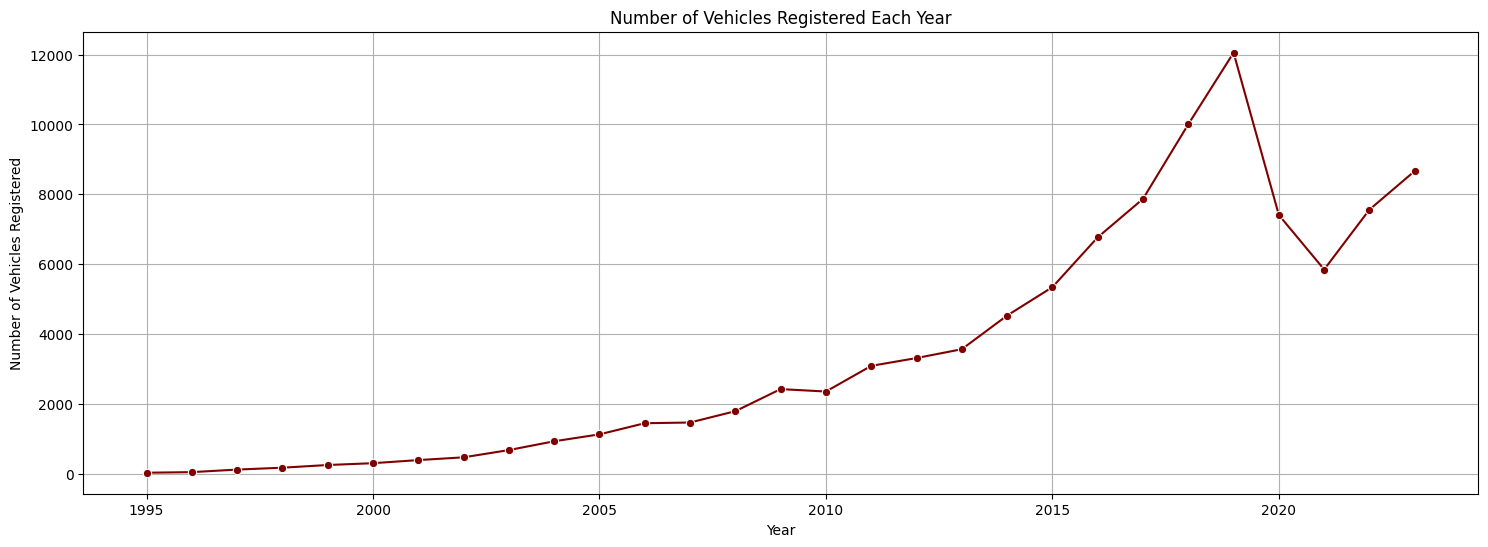

In [36]:
# Plot the number of vehicles registered each year
plt.figure(figsize=(18, 6))
sns.lineplot(x=yearly_registrations.index, y=yearly_registrations.values, marker='o', color='maroon')
plt.title('Number of Vehicles Registered Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Registered')
plt.grid(True)
plt.show()

CONCLUSION :
- There is a steady increase in number of vehicles registered each year from the year 1995 till 2019.
- After that till year 2021 there is a sharp decline in the number of vehicles registered.
- After that the trend starts to increase again.

6. Correlation Analysis
- Analyze the relationship between price_in_euro and power_kw , power_ps . Use scatter plots and calculate correlation coefficients.
- Explore how fuel_consumption_l_100km relates to power_kw and power_ps .

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='power_kw', ylabel='price_in_euro'>

Text(0.5, 1.0, 'Price in Euro vs. Power (kW)')

Text(0.5, 0, 'Power (kW)')

Text(0, 0.5, 'Price in Euro')

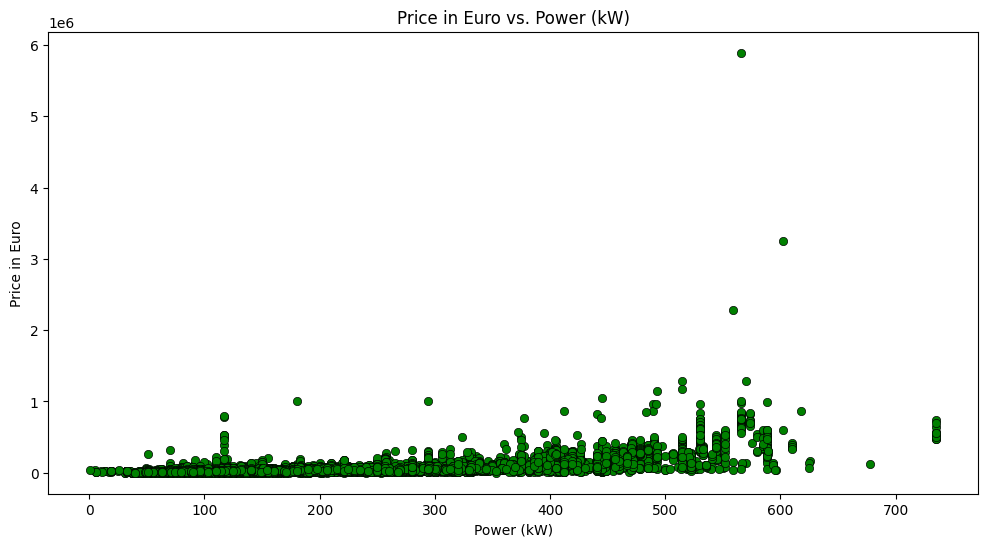

In [37]:
# Scatter plot for price_in_euro vs. power_kw
plt.figure(figsize=(12, 6))
sns.scatterplot(x='power_kw', y='price_in_euro', data=df, color='green', edgecolor='black')
plt.title('Price in Euro vs. Power (kW)')
plt.xlabel('Power (kW)')
plt.ylabel('Price in Euro')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='power_ps', ylabel='price_in_euro'>

Text(0.5, 1.0, 'Price in Euro vs. Power (PS)')

Text(0.5, 0, 'Power (PS)')

Text(0, 0.5, 'Price in Euro')

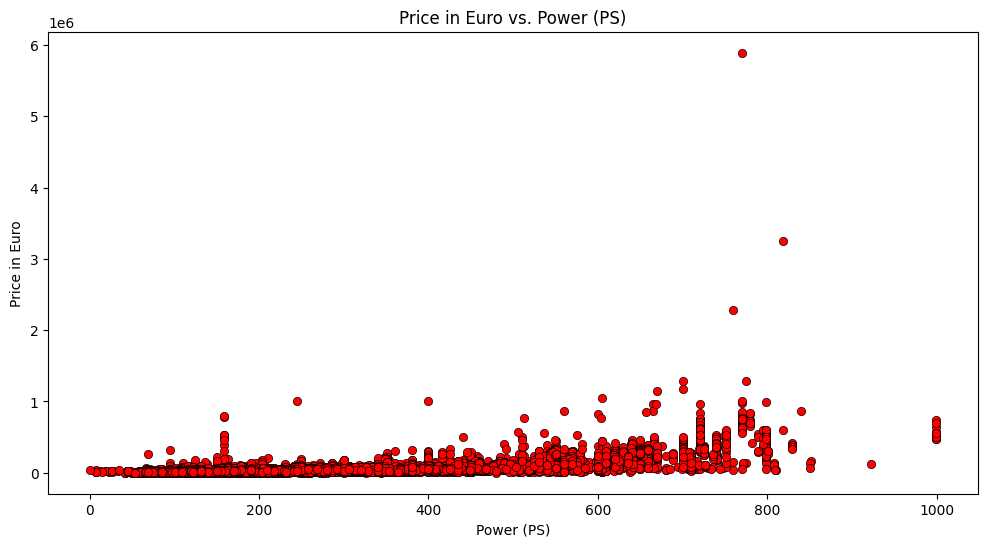

In [38]:
# Scatter plot for price_in_euro vs. power_ps
plt.figure(figsize= (12, 6))
sns.scatterplot(x='power_ps', y='price_in_euro', data=df, color='red', edgecolor='black')
plt.title('Price in Euro vs. Power (PS)')
plt.xlabel('Power (PS)')
plt.ylabel('Price in Euro')
plt.show()

In [39]:
# Calculate correlation coefficients for price_in_euro with power_kw and power_ps
correlation_price_power_kw = df['price_in_euro'].corr(df['power_kw'])
correlation_price_power_ps = df['price_in_euro'].corr(df['power_ps'])

In [40]:
correlation_price_power_kw, correlation_price_power_ps

(0.6067942680025759, 0.606815954624277)

CONCLUSION :
- The correlation coefficients of both price_in_eoru with power(kW) and power(PS) is showing positive relationship strong.
- The values represent that they have a significant strong relation.

In [41]:
# Clean and convert 'fuel_consumption_l_100km' (handling formats like "5,1 l/100 km")
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'].str.replace(',', '.').str.extract('(\d+.\d+)')[0], errors='coerce')

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='power_kw', ylabel='fuel_consumption_l_100km'>

Text(0.5, 1.0, 'Fuel Consumption (L/100km) vs. Power (kW)')

Text(0.5, 0, 'Power (kW)')

Text(0, 0.5, 'Fuel Consumption (L/100km)')

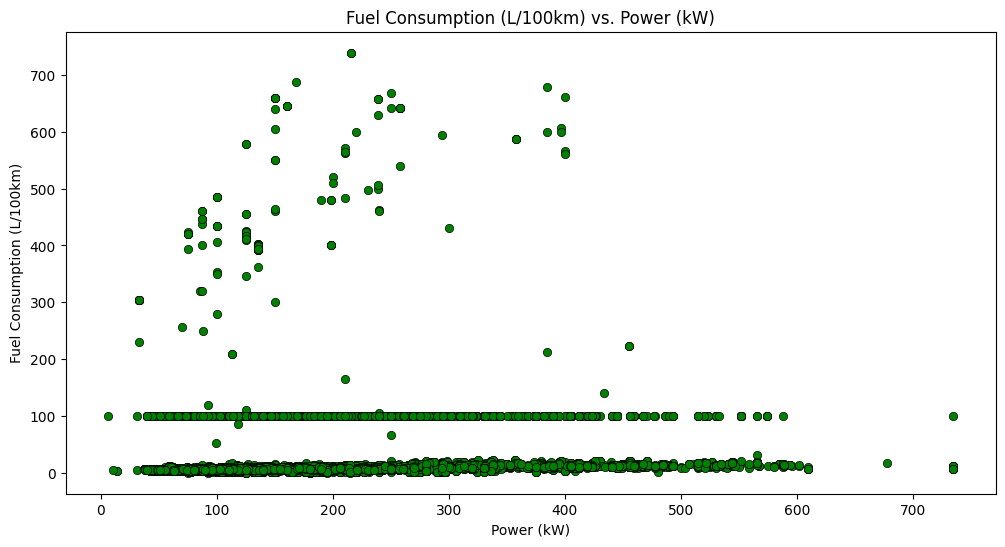

In [42]:
# Scatter plot for fuel_consumption_l_100km vs. power_kw
plt.figure(figsize=(12, 6))
sns.scatterplot(x='power_kw', y='fuel_consumption_l_100km', data=df, color='green', edgecolor='black')
plt.title('Fuel Consumption (L/100km) vs. Power (kW)')
plt.xlabel('Power (kW)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='power_ps', ylabel='fuel_consumption_l_100km'>

Text(0.5, 1.0, 'Fuel Consumption (L/100km) vs. Power (PS)')

Text(0.5, 0, 'Power (PS)')

Text(0, 0.5, 'Fuel Consumption (L/100km)')

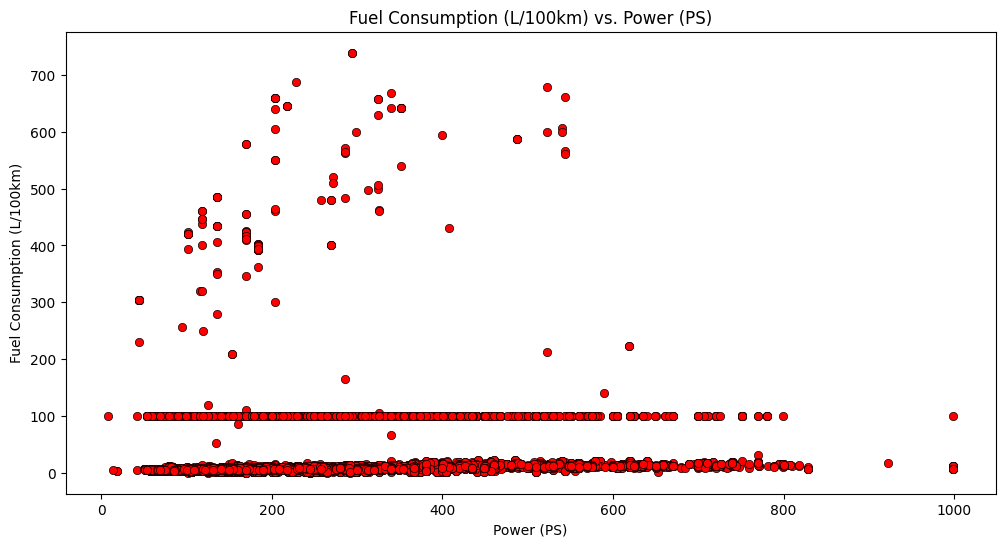

In [43]:
# Scatter plot for fuel_consumption_l_100km vs. power_ps
plt.figure(figsize= (12, 6))
sns.scatterplot(x='power_ps', y='fuel_consumption_l_100km', data=df, color='red', edgecolor='black')
plt.title('Fuel Consumption (L/100km) vs. Power (PS)')
plt.xlabel('Power (PS)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()

In [44]:
# Calculate correlation coefficients for fuel consumption with power_kw and power_ps
correlation_fuel_power_kw = df['fuel_consumption_l_100km'].corr(df['power_kw'])
correlation_fuel_power_ps = df['fuel_consumption_l_100km'].corr(df['power_ps'])

In [45]:
correlation_fuel_power_kw, correlation_fuel_power_ps

(0.05965594044415172, 0.05964777015515941)

CONCLUSION :
- The correlation coefficients of both fuel_consumption_l_100km with power(kW) and power(PS) is showing positive relationship but weak in strenght.
- The values represent that they have a minimal relation.

In [46]:
df.sample(5)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
57967,hyundai,Hyundai i30,white,04/2023,2023.0,25860,118.0,160.0,Manual,Petrol,5.4,126 g/km,5.0,WG 1.5 T-GDI 48V Premium *SOFORT* *Teilleder*Navi
69410,bmw,BMW X6 M,black,05/2017,2017.0,52990,280.0,381.0,Automatic,Diesel,7.8,206 g/km,49282.0,d /B&O/Standh/Head-Up/360°Kamera/Keyless
96655,fiat,Fiat Tipo,black,07/2019,2019.0,15980,88.0,120.0,Manual,Petrol,7.1,163 g/km,37700.0,S-Design 1.4 T-Jet EU6d-T SHZ CarPlay Klimaaut...
90207,honda,Honda CR-V,red,02/2018,2018.0,18499,114.0,155.0,Manual,Petrol,7.2,168 g/km,71290.0,2.0 i-VTEC Elegance 2WD Navi|RFK|SHZ
26901,audi,Audi A4,grey,11/2012,2012.0,7999,150.0,204.0,Automatic,Diesel,4.9,129 g/km,340000.0,Avant 2.0 TDI DPF multitronic Ambiente


7. Grouped Data Analysis
- Compare the average price of vehicles grouped by fuel_type . Which fuel type has the highest average price?
- Group the data by brand and transmission_type , and analyze the average mileage.

In [47]:
average_price_by_fuel_type = df.groupby('fuel_type')['price_in_euro'].mean().sort_values(ascending=False)
average_price_by_fuel_type

,price_in_euro
fuel_type,
Unknown,58729.044444
Electric,42980.132550
Hybrid,41585.438126
Hydrogen,41484.692308
Diesel Hybrid,41454.430657
Other,32900.583333
Petrol,30817.672389
LPG,27648.317204
Diesel,25080.378209


<Figure size 1000x600 with 0 Axes>

<ipython-input-48-8fe42371d2f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_fuel_type.index, y=average_price_by_fuel_type.values, palette="coolwarm")


<Axes: xlabel='fuel_type'>

Text(0.5, 1.0, 'Average Price of Vehicles by Fuel Type')

Text(0.5, 0, 'Fuel Type')

Text(0, 0.5, 'Average Price in Euro')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Electric'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Hydrogen'),
  Text(4, 0, 'Diesel Hybrid'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Petrol'),
  Text(7, 0, 'LPG'),
  Text(8, 0, 'Diesel'),
  Text(9, 0, 'CNG'),
  Text(10, 0, 'Ethanol')])

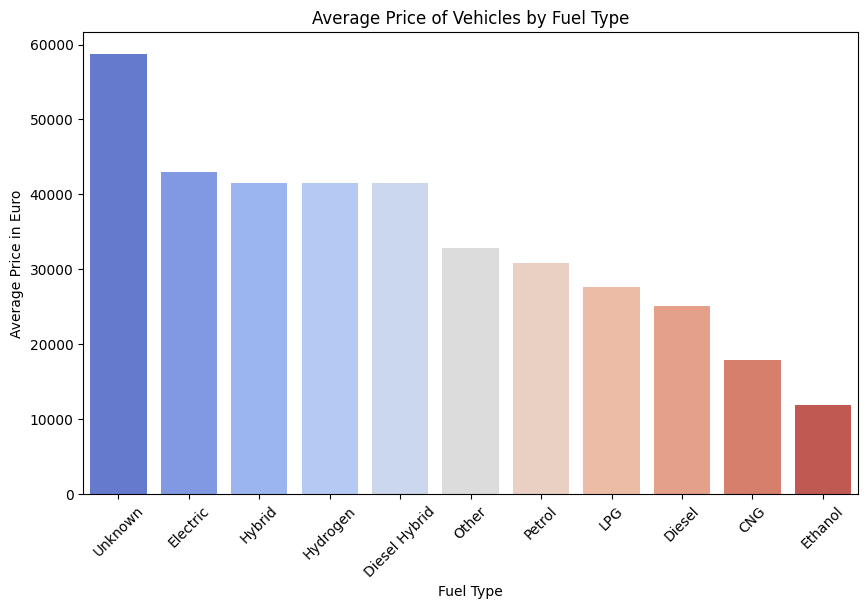

In [48]:
# Plot the average price by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_fuel_type.index, y=average_price_by_fuel_type.values, palette="coolwarm")
plt.title('Average Price of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price in Euro')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- Most Widely used fuel type Diesel And Petrol lies on cheaper side of the Average Price, this serves to tell that why it is mostly used.
- Electric, Hybrid, Hydrogen and Diesel Hybrid have similar Average Price In Euro.
- After that the Average Price in Euro starts to decline in a steady manner.

In [49]:
average_mileage_by_brand_transmission = df.groupby(['brand', 'transmission_type'])['mileage_in_km'].mean().sort_values(ascending=False)
average_mileage_by_brand_transmission.sample(10)

,,mileage_in_km
brand,transmission_type,
jeep,Unknown,72850.000000
aston-martin,Manual,45756.482759
jeep,Automatic,40802.559178
bentley,Automatic,41660.309259
lamborghini,Automatic,20962.136364
jaguar,Manual,78100.073171
jeep,Manual,41355.830357
jaguar,Unknown,48718.000000
alfa-romeo,Semi-automatic,82182.000000


8. Text Data Analysis
- Extract keywords from offer_description that frequently appear in the top 5% priced vehicles. What features are commonly advertised in
higher-priced vehicles?

In [50]:
top_5_percent_threshold = np.percentile(df['price_in_euro'], 95)
top_5_percent_vehicles = df[df['price_in_euro'] >= top_5_percent_threshold]

print(top_5_percent_threshold)
top_5_percent_vehicles

69990.0


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
11,bmw,BMW X5,blue,07/2022,2022.0,87800,290.0,394.0,Automatic,Hybrid,NaN,99 km Reichweite,21674.0,xDrive45e M Sport h&k AHK Pano Laser ACC PA
56,lamborghini,Lamborghini Huracan,red,08/2018,2018.0,334900,471.0,640.0,Automatic,Petrol,12.3,285 g/km,13819.0,Performante Spyder LP 640-4
92,audi,Audi SQ5,black,08/2018,2018.0,178000,260.0,354.0,Automatic,Petrol,8.3,- (g/km),18500.0,3.0 TFSI quattro/HUD/B&O/360°/Luftfed./Distr
93,audi,Audi RS Q8,green,04/2021,2021.0,139980,441.0,600.0,Automatic,Petrol,12.1,276 g/km,53617.0,Dynamikpaket+*Pano*Keramik*Carbon*AHK*
100,ferrari,Ferrari F8 Tributo,red,02/2021,2021.0,299900,530.0,721.0,Automatic,Petrol,NaN,- (g/km),2300.0,**VOLL CARBON*CARBON-SITZE*LIFT**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99878,ferrari,Ferrari 488,silver,03/2016,2016.0,275000,493.0,670.0,Automatic,Petrol,NaN,0 g/km,15900.0,Spider PDC
99883,ferrari,Ferrari 488,black,07/2016,2016.0,219900,493.0,670.0,Automatic,Petrol,11.4,260 g/km,30891.0,RacingSeats/FullCarbon/JBL/Camera
99915,bentley,Bentley Continental,black,10/2021,2021.0,259680,405.0,551.0,Automatic,Petrol,11.7,266 g/km,3500.0,GTC V8 *Mulliner*Touring*
99945,audi,Audi RS4,green,12/2019,2019.0,73880,331.0,450.0,Automatic,Petrol,9.5,216 g/km,51000.0,"RS4 Avant 2.9TFSI Quattro / Matrix,Pano,Vmax280"


9. Multivariate Analysis
- Create pair plots of the following variables: price_in_euro , power_kw , mileage_in_km , and fuel_consumption_l_100km . What patterns can be observed in these plots?

In [51]:
# Selecting relevant columns for pair plot
selected_columns = df[['price_in_euro', 'power_kw', 'mileage_in_km', 'fuel_consumption_l_100km']]

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.02, 'Pair Plot Between Pirce(Euro), Power(kw), Mileage(km), Fuel_Consumtion(l/100km)')

<Figure size 1000x800 with 0 Axes>

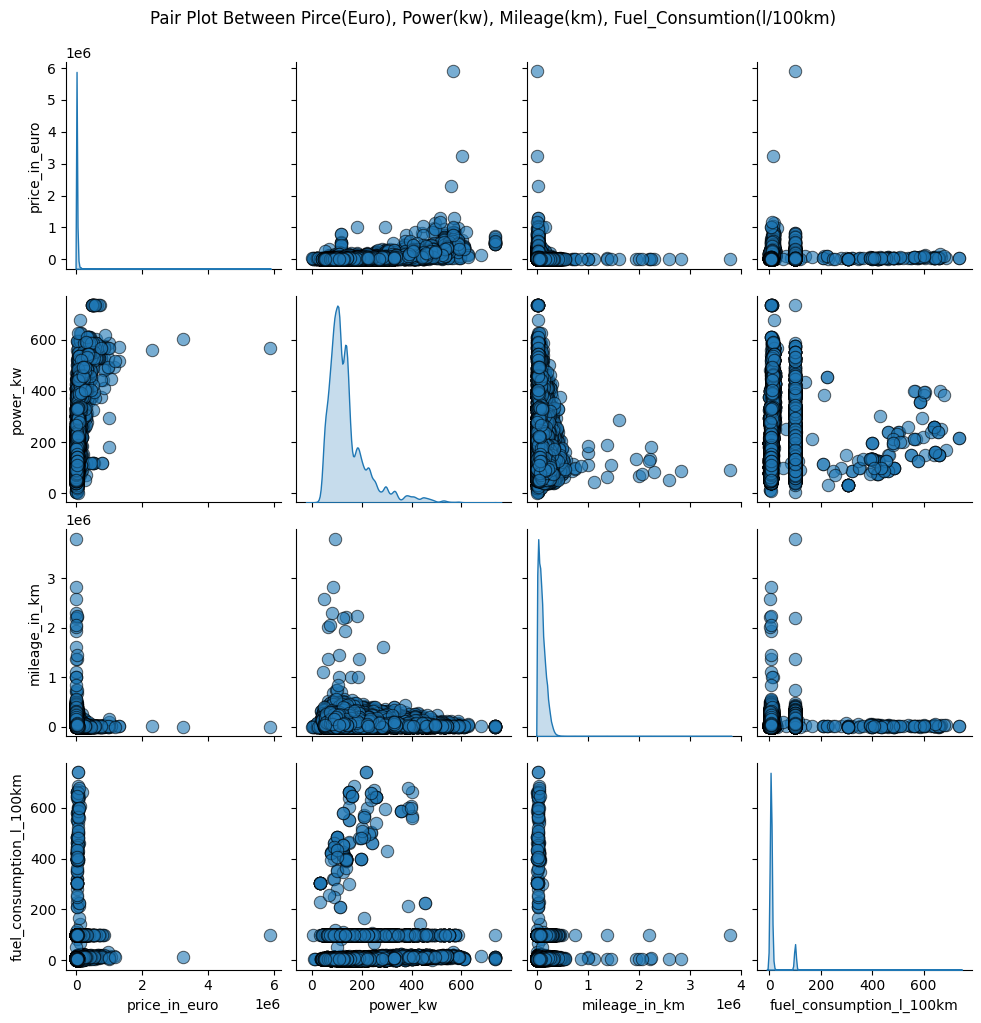

In [52]:
# Pair plot
plt.figure(figsize= (10, 8))
sns.pairplot(selected_columns, diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, height=2.5)
plt.suptitle('Pair Plot Between Pirce(Euro), Power(kw), Mileage(km), Fuel_Consumtion(l/100km)', y=1.02)
plt.show()

CONCLUSION :
- Price is strongly correlated with Power and, to a lesser extent, Fuel Consumption.
- Mileage is negatively correlated with Power and has a weak negative correlation with Fuel Consumption.
- Overall, the pair plot provides valuable insights into the factors influencing the price and performance of the cars in the dataset.

10. Anomaly Detection
- Identify any anomalies in the price_in_euro and mileage_in_km columns. What could be potential reasons for these anomalies? Discuss and
visualize any vehicles that significantly deviate from the norm

In [53]:
def identify_anomalies(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    anomalies = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return anomalies

In [54]:
price_anomalies = identify_anomalies('price_in_euro')
mileage_anomalies = identify_anomalies('mileage_in_km')

In [55]:
price_anomalies

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
11,bmw,BMW X5,blue,07/2022,2022.0,87800,290.0,394.0,Automatic,Hybrid,NaN,99 km Reichweite,21674.0,xDrive45e M Sport h&k AHK Pano Laser ACC PA
24,bmw,BMW X5,blue,07/2021,2021.0,68990,245.0,333.0,Automatic,Petrol,8.4,192 g/km,19788.0,xDrive40i M Sport 20'' H/K Pano StHzg AHK Lase...
38,land-rover,Land Rover Range Rover Evoque,grey,06/2023,2023.0,63900,147.0,200.0,Automatic,Petrol,9.3,211 g/km,1500.0,"2.0 Benzin P200 R-Dynamic SE,"
56,lamborghini,Lamborghini Huracan,red,08/2018,2018.0,334900,471.0,640.0,Automatic,Petrol,12.3,285 g/km,13819.0,Performante Spyder LP 640-4
92,audi,Audi SQ5,black,08/2018,2018.0,178000,260.0,354.0,Automatic,Petrol,8.3,- (g/km),18500.0,3.0 TFSI quattro/HUD/B&O/360°/Luftfed./Distr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99915,bentley,Bentley Continental,black,10/2021,2021.0,259680,405.0,551.0,Automatic,Petrol,11.7,266 g/km,3500.0,GTC V8 *Mulliner*Touring*
99917,fiat,Fiat Ducato,white,02/2020,2020.0,62500,103.0,140.0,Manual,Diesel,6.8,179 g/km,21000.0,BÜRSTNER TRAVEL VAN T 590 G - Riva Loft
99945,audi,Audi RS4,green,12/2019,2019.0,73880,331.0,450.0,Automatic,Petrol,9.5,216 g/km,51000.0,"RS4 Avant 2.9TFSI Quattro / Matrix,Pano,Vmax280"
99955,jeep,Jeep Wrangler,grey,01/2023,2023.0,75750,280.0,381.0,Automatic,Hybrid,4.1,94 g/km,20.0,Unlimited Sahara 4xe Sky-One-Touch


In [56]:
mileage_anomalies

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
17,audi,Audi A4,silver,09/1999,1999.0,3000,142.0,193.0,Manual,Petrol,9.4,226 g/km,449000.0,Avant 2.8
21,audi,Audi A6,silver,10/2004,2004.0,2999,120.0,163.0,Automatic,Diesel,6.9,- (g/km),340000.0,Avant 2.5 TDI
89,bmw,BMW X3,silver,10/2012,2012.0,12290,190.0,258.0,Automatic,Diesel,100.0,159 g/km,284858.0,30d 8G-AUT.HEADUP*NAVI-PROF*XENON*M-SPORTSITZE...
115,ford,Ford Mondeo,silver,07/2017,2017.0,7600,110.0,150.0,Manual,Diesel,4.4,112 g/km,291000.0,Trend Business (CNG)
201,bmw,BMW 325,silver,10/2009,2009.0,8500,145.0,197.0,Manual,Diesel,5.9,- (g/km),307007.0,325d DPF Touring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99788,bmw,BMW 320,black,12/1999,1999.0,2200,110.0,150.0,Manual,Diesel,5.7,152 g/km,300000.0,320d
99834,audi,Audi A6,black,06/2005,2005.0,2950,125.0,170.0,Manual,LPG,9.9,- (g/km),400000.0,A6 Avant 2.4
99869,bmw,BMW 330,black,06/2003,2003.0,6500,150.0,204.0,Automatic,Diesel,7.7,- (g/km),280000.0,Cd Aut. Individual Aplina Paket
99970,audi,Audi A8,silver,06/2005,2005.0,7900,171.0,232.0,Automatic,Diesel,8.7,231 g/km,318752.0,3.0 TDI quattro TÜV Neu Schiebedach
